<b> Background </b> <br>
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
    
<b> Task </b> <br>
Identify fraudulent credit card transactions.
    
<b> Content </b> <br>
The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

<b> Target </b> <br>
90% auc

In [1]:
import pandas as pd
import numpy as np

# neural network
# import tensorflow as tf

# preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# classifiers
from sklearn.ensemble import RandomForestClassifier

# Cross validation / Metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score  # ability to find all positive samples
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import auc

# visual
import matplotlib.pyplot as plt
import seaborn as sns

# debugger
# import pixiedust

import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = FutureWarning)

In [2]:
df = pd.read_csv('../credit_card_fraud_detection/creditcard.csv')

In [3]:
df.shape

(284807, 31)

In [4]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.656562e-16 -3.444850e-16  2.578648e-16  4.471968e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.687098e-15 -3.666453e-16 -1.220404e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [5]:
print('Non Fraudulent:', df['Class'].value_counts()[0], 'cases')
print('Non Fraudulent: %.3f' % ((df['Class'].value_counts()[0]/len(df))*100), "%")
print('Fraudulent:', df['Class'].value_counts()[1], 'cases')
print('Fraudulent: %.3f' % ((df['Class'].value_counts()[1]/len(df))*100), "%")

Non Fraudulent: 284315 cases
Non Fraudulent: 99.827 %
Fraudulent: 492 cases
Fraudulent: 0.173 %


In [6]:
# Any missing values in columns
df.isnull().sum().max()

0

In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 10)

In [8]:
scaler = RobustScaler()
X_train['Amount'] = scaler.fit_transform(X_train['Amount'].values.reshape(-1, 1))
X_test['Amount'] = scaler.transform(X_test['Amount'].values.reshape(-1, 1))

X_train['Time'] = scaler.fit_transform(X_train['Time'].values.reshape(-1,1))
X_test['Time'] = scaler.transform(X_test['Time'].values.reshape(-1,1))

/Users/somaochu/.local/share/virtualenvs/credit_card_fraud_detection-ULBgM0Rz/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/somaochu/.local/share/virtualenvs/credit_card_fraud_detection-ULBgM0Rz/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/somaochu/.local/share/virtualenvs/credit_card_fraud_detection-ULBgM0Rz

### Metrics

Which metrics are chosen? why?

### Baseline Model

The dummy classifier makes predictions using simple rules. It is used as a baseline. It is useful as we can compare more complex model to this. We can compare the scores from this classifier to the scores of ours. It provides context on how good a chosen model is.

Baseline Model: f1=0.000 auc=0.501


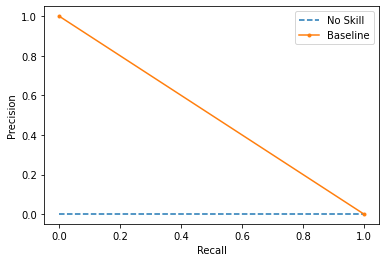

In [10]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = 'most_frequent', random_state = 10)
dummy.fit(X_train, y_train)

# predict probabilities
rf_probs = dummy.predict_proba(X_test)

# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]

# predict class values
yhat = dummy.predict(X_test)
rf_precision, rf_recall, thresholds = precision_recall_curve(y_test, rf_probs, pos_label = 1)
rf_f1, rf_auc = f1_score(y_test, yhat), auc(rf_recall, rf_precision)

# summarize scores
print('Baseline Model: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))

# plot the precision-recall curves
no_skill = len(y_test[y_test == 1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(rf_recall, rf_precision, marker='.', label='Baseline')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# show the legend
plt.legend()

# show the plot
plt.show()

I used 'most frequent' for the 'strategy' parameter. It always predicts the most frequent label in the training set, i.e. 0, in this problem. The majority of the class is 0 in the dataset, so predicting every observation as 0 in the test set could achieve not so bad result, which we see in the auc score, i.e. 0.501. This is our starting point. We aim to improve this.

### Model

<b> I chose Random Forest model because it normally performs pretty well in a classification problem. But the class is highly imbalanced, would random forest still achieve good result?


#### 1. Random Forest

Random Forest: f1=0.882 auc=0.873


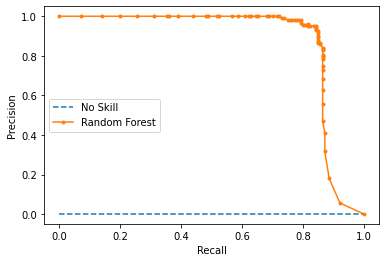

In [11]:
# Fit the model to training data
classifier = RandomForestClassifier(random_state = 10)
classifier.fit(X_train, y_train)

# predict probabilities
rf_probs = classifier.predict_proba(X_test)

# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]

# predict class values
yhat = classifier.predict(X_test)
rf_precision, rf_recall, thresholds = precision_recall_curve(y_test, rf_probs, pos_label = 1)
rf_f1, rf_auc = f1_score(y_test, yhat), auc(rf_recall, rf_precision)

# summarize scores
print('Random Forest: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))

# plot the precision-recall curves
no_skill = len(y_test[y_test == 1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(rf_recall, rf_precision, marker='.', label='Random Forest')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# show the legend
plt.legend()

# show the plot
plt.show()

The result is pretty good. F1 score is 0.882. The area under curve (auc) is 0.873. The scores have improved a lot! 